<a href="https://colab.research.google.com/github/yexf308/AdvancedMachineLearning/blob/main/Homework/HW3/HW3Q1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline 
import numpy.linalg as LA
from time import time

Populating the interactive namespace from numpy and matplotlib


# Q1: Implementing PageRank and HITS (30pt)
In this problem, you will implement the PageRank and HITS algorithms for large network. 
## Data Loading
First of all, we authenticate a Google Drive client to download the dataset we will be processing in this Colab.

**Make sure to follow the interactive instructions.**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
id='1EoolSK32_U74I4FeLox88iuUB_SUUYsI'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('web-Stanford.txt')

If you executed the cells above, you should be able to see the dataset we will use for this Colab under the "Files" tab on the left panel.



For this Colab we will be using [NetworkX](https://networkx.github.io), a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

If you want to explore NetworkX more, consider following [this tutorial](https://networkx.org/documentation/stable/tutorial.html).

The dataset we will analyze is a snapshot of the Web Graph centered around [stanford.edu](https://stanford.edu), collected in 2002. Nodes represent pages from Stanford University (stanford.edu) and directed edges represent hyperlinks between them. [[More Info]](http://snap.stanford.edu/data/web-Stanford.html). 

The dataset is massive so brute force method is not possible. 

In [ ]:
# load the graph as directed graph
import networkx as nx
G = nx.read_edgelist('web-Stanford.txt', create_using=nx.MultiDiGraph )
print(nx.info(G))

MultiDiGraph with 281903 nodes and 2312497 edges


In [ ]:
W = nx.adjacency_matrix(G)
print(W.shape)

(281903, 281903)


In [ ]:
# nodes of G in the following order 
# nodes are not in the order of '1', '2', '3', ...
print(G.nodes)

['1', '6548', '15409', '57031', '13102', '2', '17794', '25202', '53625', '54582', '64930', '73764', '84477', '98628', '100193', '102355', '105318', '105730', '115926', '140864', '163550', '164599', '175799', '178642', '181714', '190453', '204189', '204604', '210870', '213966', '225119', '241596', '243294', '246897', '251658', '252915', '280935', '78056', '47149', '18816', '182456', '3', '74361', '7213', '10365', '18412', '21315', '25126', '28140', '40745', '47352', '58718', '60036', '83203', '100770', '120861', '123955', '133747', '146989', '152019', '153900', '176541', '192120', '198821', '215600', '220070', '224643', '226411', '239874', '255694', '264216', '266083', '268261', '4', '35716', '96512', '186750', '225872', '829', '3776', '3869', '4514', '5030', '5682', '9722', '10901', '11020', '12034', '13719', '13855', '14525', '15781', '15815', '17253', '17567', '17745', '18687', '18811', '20206', '21976', '22429', '23805', '24206', '24838', '26090', '29597', '31926', '34500', '35616',



---


## Q1.1: PageRank Implementation
The markov matrix $P_\alpha=\alpha D^{-1}W +(1-\alpha) E$, where $E=\frac{1}{N}\mathbb{1}\mathbb{1}^\top$. In pagerank, $\alpha$ is set as 0.85. 
 We will implement power method to caclulate the stationary distribution. 

- Initialize the row vector: $\mathbf{r}^{(0)}=\frac{1}{N}\mathbb{1}$.

- Iterate for $i$ from 1 to $k$, $\mathbf{r}^{(i+1)}=\mathbf{r}^{(i)}P_\alpha$. $P_\alpha$ is NOT sparse and you should not explicitly write up $P_\alpha$, instead you should implement the sparse multiplcation. 

- Please set up your own stopping criteria and stop the iteration if needed.   


In [ ]:
# Your code starts here



---


## Q1.2: HITS Implementation

Find the primary right singular vector of $W$ which is HITS-authority. 

Find the primary left singular vector of $W$ which is HITS-hub. 

In [ ]:
# Your code starts here



---

# Q2: Order the face revisited (30pt)
 The following dataset contains 33 faces of the same person $(Y\in \mathbb{R}^{112\times 92\times 33})$ in different angles. You may create a data matrix $\mathbf{X}\in \mathbb{R}^{N\times D}$, where $N=33, D= 112\times 92= 10304$. 

In [ ]:
from scipy.io import loadmat

!wget https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW1/face.mat?raw=true -O face.mat

data = loadmat('face.mat')
Y, id = data['Y'], data['id']
print(id.shape)
print(Y.shape)

--2022-01-30 03:34:57--  https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW1/face.mat?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/AdvancedMachineLearning/raw/main/Homework/HW1/face.mat [following]
--2022-01-30 03:34:57--  https://github.com/yexf308/AdvancedMachineLearning/raw/main/Homework/HW1/face.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/AdvancedMachineLearning/main/Homework/HW1/face.mat [following]
--2022-01-30 03:34:57--  https://raw.githubusercontent.com/yexf308/AdvancedMachineLearning/main/Homework/HW1/face.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

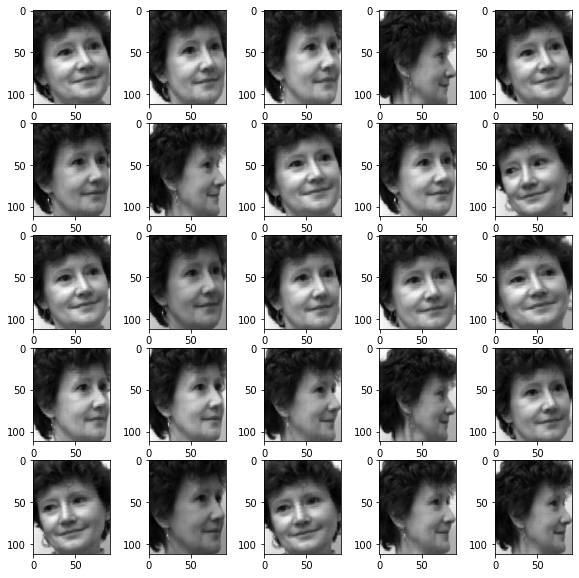

In [ ]:
fig, axs = plt.subplots(5, 5,figsize=(10,10))
axs = axs.ravel()
for i in range(25):
    axs[i].imshow(Y[:,:,i], cmap='gray')



---


## Q2.1 locally linear embedding
Explore the LLE-embedding of the 33 faces on the $k = 5$ nearest neighbor graph and compare it against ISOMAP. 

In [ ]:
# Your code starts here



---


## Q2.2 Laplacian Eigenmaps
Explore the Laplacian Eigenmaps of the 33 faces on the $k = 5$ nearest neighbor graph. 

In [ ]:
# Your code starts here



---


## Q2.3  Summary of all four methods
Please compare with all four methods and comment on your findings.

# Your answer:



---


# Q3: DBSCAN clustering (40pt)
Let $\{\mathbf{x}^{(i)}\}_{i=1}^N\subset \mathbb{R}^D$ be a discrete set on unique points. Recall that the DBSCAN algorithm depends on two parameters: $\epsilon$ and MinPts. 

## Q3.1 Theory
- Describe the behavior of DBSCAN as $\epsilon\rightarrow +\infty$ and as $\epsilon\rightarrow 0^+$. 

- Describe the behavior of DBSCAN as $\text{MinPts}\rightarrow +\infty$ and as $\text{MinPts}\rightarrow 0^+$. 

# Your answer:



---


## Q3.2 Implement DBSCAN 

In the `expand_cluster` we userecursive method which expands the cluster until we have reached the border of the dense area. This is called **Depth-first search**. This process could be very slow as you see from the class demo. 

In the following, please implement **breadth-first search** version of `expand_cluster`. instead, i.e, you will explore all neighbour points at the present depth prior to moving on to the next depth level. 


Please compare the performance and speed with the class demo example.  


In [ ]:

# Please only modify expand_cluster function. 


class DBSCAN():
    """A density based clustering method that expands clusters from 
    samples that have more neighbors within a radius specified by eps
    than the value minPts.
    Parameters:
    -----------
    eps: float
        The radius within which samples are considered neighbors
    minPts: int
        The number of neighbors required for the sample to be a core point. 
    """
    def __init__(self, eps=1, minPts=5):
        self.eps = eps
        self.minPts = minPts

    def _get_neighbors(self, sample_i):
        """ Return a list of indexes of neighboring samples
        A sample_2 is considered a neighbor of sample_1 if the distance between
        them is smaller than epsilon """
        neighbors = []
        for i, _sample in enumerate(self.X):
            distance = norm(self.X[sample_i]- _sample, 2)
            if distance < self.eps:
                neighbors.append(i)
        return np.array(neighbors)

    def _expand_cluster(self, sample_i, neighbors):
        # *** Your code starts here ***

        return cluster

    def _get_cluster_labels(self):
        """ Return the samples labels as the index of the cluster in which they are
        contained """
        # Set default value to number of clusters
        # Will make sure all outliers have same cluster label
        labels = np.full(shape=self.X.shape[0], fill_value=len(self.clusters))
        for cluster_i, cluster in enumerate(self.clusters):
            for sample_i in cluster:
                labels[sample_i] = cluster_i
        return labels

    # DBSCAN
    def predict(self, X):
        self.X = X
        self.clusters = []
        self.visited_samples = []
        self.neighbors = {}
        n_samples = np.shape(self.X)[0]
        # Iterate through samples and expand clusters from them
        # if they have more neighbors than self.minPts
        for sample_i in range(n_samples):
            if sample_i in self.visited_samples:
                continue
            self.neighbors[sample_i] = self._get_neighbors(sample_i)
            if len(self.neighbors[sample_i]) >= self.minPts:
                # If core point => mark as visited
                self.visited_samples.append(sample_i)
                # Sample has more neighbors than self.minPts => expand
                # cluster from sample
                new_cluster = self._expand_cluster(
                    sample_i, self.neighbors[sample_i])
                # Add cluster to list of clusters
                self.clusters.append(new_cluster)

        # Get the resulting cluster labels
        cluster_labels = self._get_cluster_labels()
        return cluster_labels